## Linear Regression Analysis on Fuel Consumption Data
In this notebook, I'll apply **simple linear regression** and **multiple linear regression** techniques to analyze a fuel consumption dataset. The dataset contains **model-specific fuel consumption ratings** and **estimated carbon dioxide (CO₂) emissions** for new light-duty vehicles available for retail sale in Canada.

The objective of this analysis is to:
- Explore the relationship between fuel consumption and CO₂ emissions  
- Compare the performance of simple and multiple linear regression models  
- Evaluate how adding relevant features affects model accuracy and predictive power  

### Dataset Description
The dataset includes variables such as:
- Engine size  
- Number of cylinders  
- Fuel consumption (combined MPG)  
- Estimated CO₂ emissions  

### 🔗 Data Source
The dataset is publicly available from the Government of Canada:

https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64


In [3]:
df=pd.read_csv("data.csv")

In [6]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
514,2014,HYUNDAI,SONATA,FULL-SIZE,2.4,4,A6,X,9.8,7.0,8.5,33,196
968,2014,TOYOTA,CAMRY,MID-SIZE,2.5,4,AS6,X,9.5,6.6,8.2,34,189
873,2014,PORSCHE,911 CARRERA 4S CABRIOLET,MINICOMPACT,3.8,6,AM7,Z,12.7,9.0,11.0,26,253
1010,2014,TOYOTA,VENZA 4WD,SUV - SMALL,2.7,4,AS6,X,11.6,8.5,10.2,28,235
148,2014,BUICK,LACROSSE eASSIST,MID-SIZE,2.4,4,AS6,X,9.6,6.5,8.2,34,189


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
311,3.6,6,10.2,235
449,6.0,8,25.7,411
141,3.6,6,12.6,290
882,3.8,6,11.9,274
699,3.7,6,12.3,283
822,2.0,4,8.6,198
856,2.5,4,8.6,198
925,6.7,12,17.1,393
862,1.6,4,7.7,177


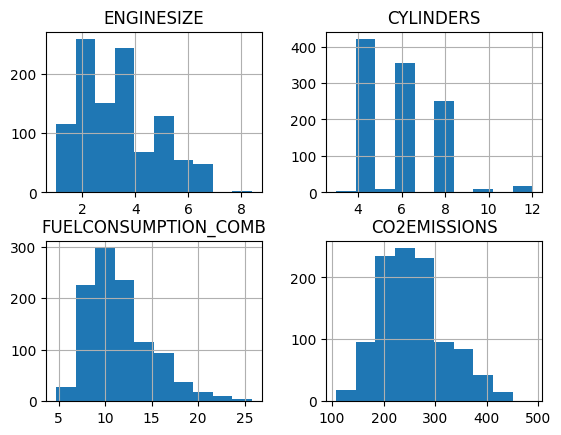

In [9]:
cdf.hist()
plt.show()

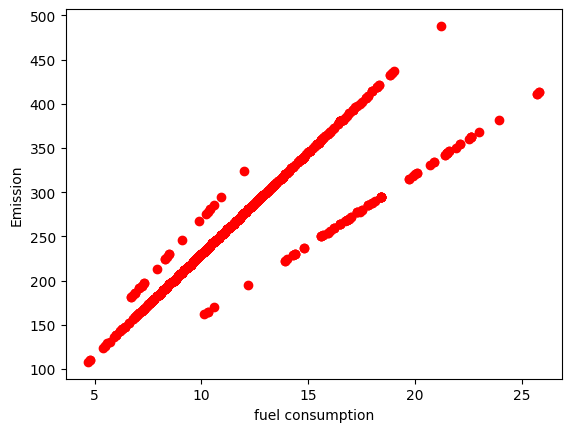

In [19]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = "red")
plt.xlabel("fuel consumption")
plt.ylabel("Emission")
#plt.xlim(0,27)
plt.show()

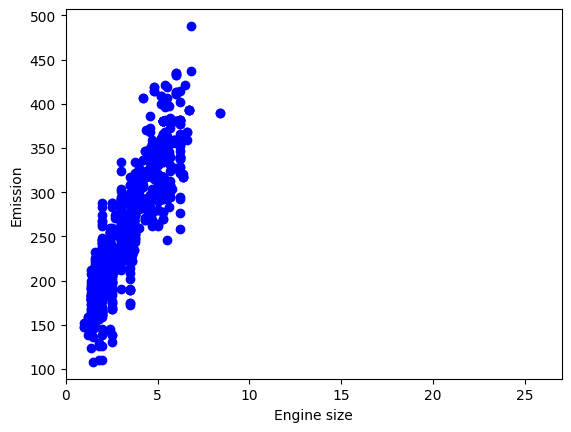

In [17]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "b")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

In [20]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
type(X_train), np.shape(X_train), np.shape(y_train)

(numpy.ndarray, (853,), (853,))

In [26]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()

regressor.fit(X_train.reshape(-1,1), y_train)
print("coefficient: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

coefficient:  [38.99297872]
Intercept:  126.28970217408721


In [31]:
np.shape(X_train.reshape(-1,1))

(853, 1)

Text(0, 0.5, 'Emission')

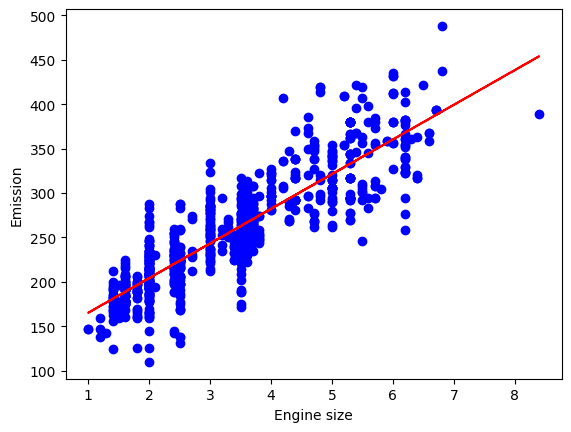

In [32]:
plt.scatter(X_train, y_train, color = "b")
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, "r")
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))


Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


Text(0, 0.5, 'Emission')

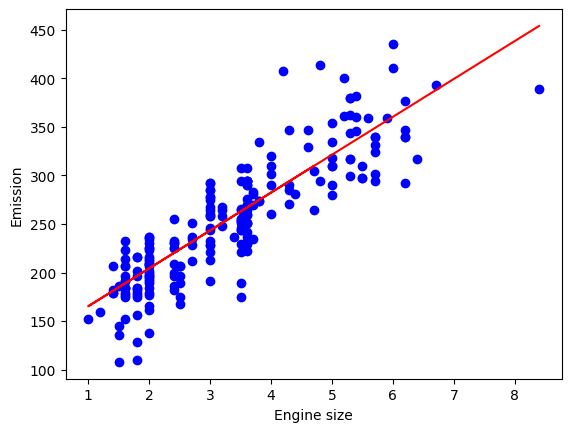

In [34]:
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_test, regressor.coef_* X_test + regressor.intercept_, "-r")
plt.xlabel("Engine size")
plt.ylabel("Emission")

### lets try now with fuel consumption as independent var

In [48]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1,1), y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
y_test_ = regr.predict(X_test.reshape(-1,1))

In [52]:
print("mean squared error is: %.2f" %mean_squared_error(y_test, y_test_))

mean squared error is: 797.43


In [53]:
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 20.44
Mean squared error: 797.43
Root mean squared error: 28.24
R2-score: 0.81


Text(0, 0.5, 'Emission')

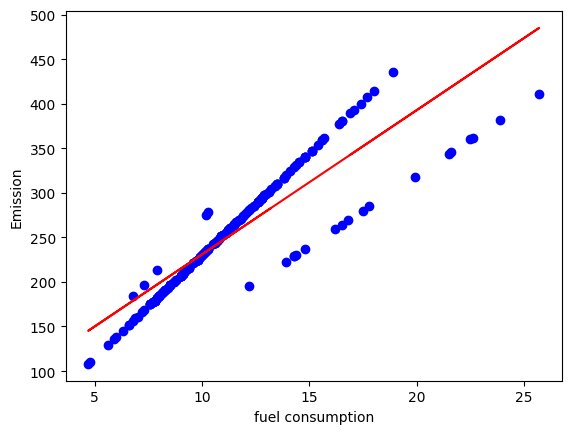

In [54]:
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_test, regr.coef_* X_test + regr.intercept_, "-r")
plt.xlabel("fuel consumption")
plt.ylabel("Emission")

# MULTIPLE LINEAR REGRESSION
Used only two highly correlated features `ENGINESIZE` and `FUELCONSUMPTION_COMB_MPG`  

In [55]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [56]:
# Drop categoricals and any unseless columns
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

In [58]:
df.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
169,3.0,6,12.7,8.9,11.0,26,253
82,2.0,4,10.4,6.7,8.7,32,200
432,3.6,6,14.3,9.9,12.3,23,283
100,3.0,6,9.2,6.4,7.9,36,213
604,2.0,4,9.7,6.8,8.4,34,193


In [60]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [61]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


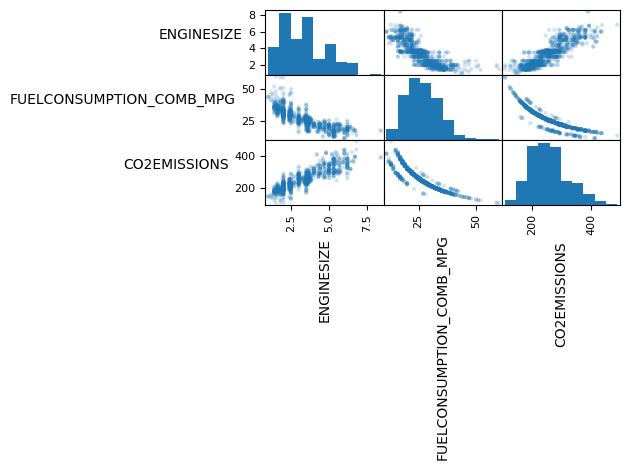

In [62]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
#need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [63]:
X = df.iloc[:, [0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

In [65]:
from sklearn import preprocessing
std_scalar = preprocessing.StandardScaler()
X_std = std_scalar.fit_transform(X)

In [68]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y , test_size=0.2,random_state=42)

In [70]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model in the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ =  regressor.coef_
intercept_ = regressor.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)


Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


In [72]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scalar.mean_
std_devs_ = np.sqrt(std_scalar.var_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)


Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


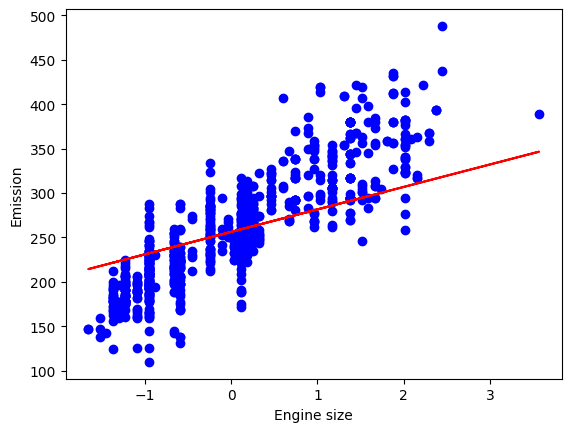

In [74]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [75]:
y_test_ = regressor.predict(X_test)

In [76]:
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 14.29
Mean squared error: 466.11
Root mean squared error: 21.59
R2-score: 0.89


Multiple linear regression with two features outperformed linear regression with only one feature

### Lets try adding another feature and see if performance gets better

In [79]:
df = pd.read_csv("data.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [80]:
df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1, inplace = True)

In [82]:
df.drop(["FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB" ],axis=1, inplace = True)

In [83]:
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,33,196
1,2.4,4,29,221
2,1.5,4,48,136
3,3.5,6,25,255
4,3.5,6,27,244


In [102]:
X = df.iloc[:, [0,1,2]].to_numpy()
y = df.iloc[:,[3]].to_numpy()

In [104]:
std_scalar = preprocessing.StandardScaler()
X_std = std_scalar.fit_transform(X)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y , test_size=0.2,random_state=42)

In [109]:
regressor = linear_model.LinearRegression()

# train the model in the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ =  regressor.coef_
intercept_ = regressor.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)


Coefficients:  [[ 15.10883293  11.16134215 -36.964997  ]]
Intercept:  [256.31605392]


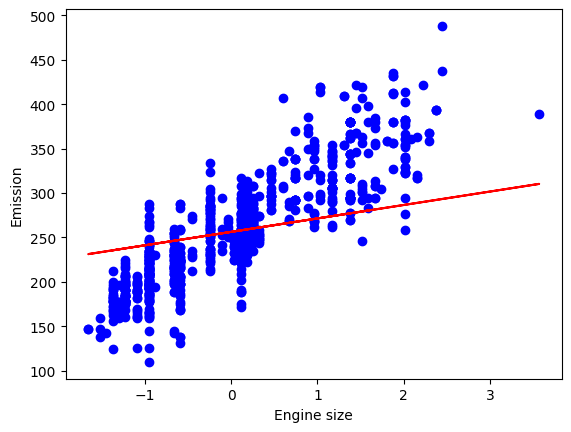

In [110]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [111]:
y_test_ = regressor.predict(X_test)

In [112]:
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 13.64
Mean squared error: 436.07
Root mean squared error: 20.88
R2-score: 0.89


##  Model Comparison and Feature Impact Analysis
The results show that adding more features can improve model performance, but the improvement depends on how strongly those features are correlated with the target variable.
### 1️⃣ Simple Linear Regression  
Using **FUELCONSUMPTION_COMB_MPG** as the only predictor:
- **Mean Absolute Error (MAE):** 20.44  
- **Mean Squared Error (MSE):** 797.43  
- **Root Mean Squared Error (RMSE):** 28.24  
- **R²-score:** 0.81  
This model explains a large portion of the variance in the target variable, indicating that fuel consumption alone is a strong predictor. However, the relatively high error values suggest that important explanatory information is missing.
### 2️⃣ Multiple Linear Regression (Two Features)  
Using **ENGINESIZE** and **FUELCONSUMPTION_COMB_MPG** as predictors:
- **Mean Absolute Error (MAE):** 14.29  
- **Mean Squared Error (MSE):** 466.11  
- **Root Mean Squared Error (RMSE):** 21.59  
- **R²-score:** 0.89  

Adding engine size significantly improves model performance. The reduction in MAE and RMSE, along with a higher R²-score, indicates that engine size provides complementary information not captured by fuel consumption alone.

### 3️⃣ Multiple Linear Regression (Three Features)  
Using **ENGINESIZE**, **FUELCONSUMPTION_COMB_MPG**, and **CYLINDERS** as predictors:

- **Mean Absolute Error (MAE):** 13.64  
- **Mean Squared Error (MSE):** 436.07  
- **Root Mean Squared Error (RMSE):** 20.88  
- **R²-score:** 0.89  

Adding cylinders results in a small improvement in error metrics, while the R²-score remains unchanged. This suggests that cylinders add limited new information beyond what is already captured by engine size and fuel consumption.
### To Conclude..

- Adding more features improves performance only if the features are informative and not highly redundant.
- Multiple linear regression performs substantially better than simple linear regression.
- The marginal improvement from adding a third feature is small, indicating possible correlation among predictors.
- Feature relevance and multicollinearity should be considered when increasing model complexity.